In [1]:
import pandas as pd
data=pd.read_csv('dataset_twitter_sentimental.csv')

In [2]:
data.head()

,0,2254623107,Sat Jun 20 10:02:00 PDT 2009,NO_QUERY,kingsean86,People are tweeting advice on how to combat tear gas in Iran. #iranelection
0,0,2254623203,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,joleendoreen,"can't go 2 the anberlin show 2nite, tickets so..."
1,0,2254623331,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,kendel_rc,Woke up with lots of wisdom teeth drama..Gotta...
2,0,2254623412,Sat Jun 20 10:02:02 PDT 2009,NO_QUERY,ctownson,@tom_teel Not yet dude... Gonna have to buy a ...
3,0,2254623626,Sat Jun 20 10:02:03 PDT 2009,NO_QUERY,skatinha,everytime i fall asleep my dreams are haunted
4,0,2254623736,Sat Jun 20 10:02:04 PDT 2009,NO_QUERY,autumnconfusion,I don't like that strangers take away my grand...


In [3]:
data.columns=['RESULTS','ID','DATE','FLAG','USERNAME','COMMENT']

In [4]:
data.head()

,RESULTS,ID,DATE,FLAG,USERNAME,COMMENT
0,0,2254623203,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,joleendoreen,"can't go 2 the anberlin show 2nite, tickets so..."
1,0,2254623331,Sat Jun 20 10:02:01 PDT 2009,NO_QUERY,kendel_rc,Woke up with lots of wisdom teeth drama..Gotta...
2,0,2254623412,Sat Jun 20 10:02:02 PDT 2009,NO_QUERY,ctownson,@tom_teel Not yet dude... Gonna have to buy a ...
3,0,2254623626,Sat Jun 20 10:02:03 PDT 2009,NO_QUERY,skatinha,everytime i fall asleep my dreams are haunted
4,0,2254623736,Sat Jun 20 10:02:04 PDT 2009,NO_QUERY,autumnconfusion,I don't like that strangers take away my grand...


In [5]:
data.isna().sum()

RESULTS     0
ID          0
DATE        0
FLAG        0
USERNAME    0
COMMENT     0
dtype: int64

In [6]:
sorted_data=data.drop(['ID','DATE','FLAG','USERNAME'],axis=1)

In [7]:
sorted_data.head()

,RESULTS,COMMENT
0,0,"can't go 2 the anberlin show 2nite, tickets so..."
1,0,Woke up with lots of wisdom teeth drama..Gotta...
2,0,@tom_teel Not yet dude... Gonna have to buy a ...
3,0,everytime i fall asleep my dreams are haunted
4,0,I don't like that strangers take away my grand...


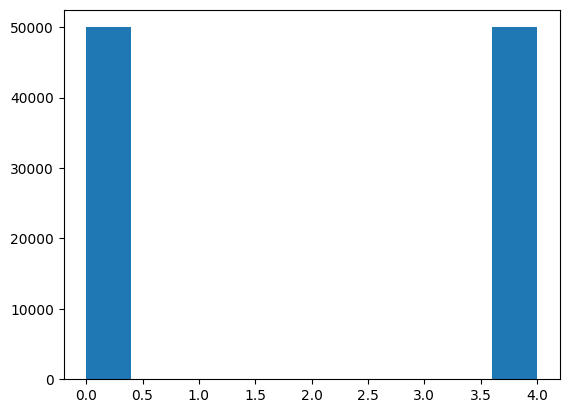

In [8]:
import matplotlib.pyplot as plt
plt.hist(sorted_data['RESULTS'])
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
sorted_data['RESULTS']=LabelEncoder().fit_transform(sorted_data['RESULTS'])

In [10]:
sorted_data

,RESULTS,COMMENT
0,0,"can't go 2 the anberlin show 2nite, tickets so..."
1,0,Woke up with lots of wisdom teeth drama..Gotta...
2,0,@tom_teel Not yet dude... Gonna have to buy a ...
3,0,everytime i fall asleep my dreams are haunted
4,0,I don't like that strangers take away my grand...
...,...,...
99993,1,Tried to get the mutant Fawkes to follow me bu...
99994,1,Sick Spending my day laying in bed listening ...
99995,1,Gmail is down?
99996,1,rest in peace Farrah! So sad


In [11]:
sorted_data['COMMENT']=sorted_data['COMMENT'].apply(lambda x:x.lower())
sorted_data

,RESULTS,COMMENT
0,0,"can't go 2 the anberlin show 2nite, tickets so..."
1,0,woke up with lots of wisdom teeth drama..gotta...
2,0,@tom_teel not yet dude... gonna have to buy a ...
3,0,everytime i fall asleep my dreams are haunted
4,0,i don't like that strangers take away my grand...
...,...,...
99993,1,tried to get the mutant fawkes to follow me bu...
99994,1,sick spending my day laying in bed listening ...
99995,1,gmail is down?
99996,1,rest in peace farrah! so sad


In [12]:
import re
def contraction(s):
    s=re.sub(r"won't","will not",s)
    s=re.sub(r"would't","would not",s)
    s = re.sub(r"could't", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s= re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub(r"doesn't", "does not",s)
    return s
sorted_data['COMMENT']=sorted_data['COMMENT'].apply(lambda x:(contraction(x)))
sorted_data

,RESULTS,COMMENT
0,0,"can not go 2 the anberlin show 2nite, tickets ..."
1,0,woke up with lots of wisdom teeth drama..gotta...
2,0,@tom_teel not yet dude... gonna have to buy a ...
3,0,everytime i fall asleep my dreams are haunted
4,0,i do not like that strangers take away my gran...
...,...,...
99993,1,tried to get the mutant fawkes to follow me bu...
99994,1,sick spending my day laying in bed listening ...
99995,1,gmail is down?
99996,1,rest in peace farrah! so sad


In [13]:
import nltk
sorted_data['COMMENT']=sorted_data['COMMENT'].apply(lambda x:" ".join([re.sub('[^A-Za-z]+','',x) for x in nltk.word_tokenize(x)]))
sorted_data

,RESULTS,COMMENT
0,0,can not go the anberlin show nite tickets so...
1,0,woke up with lots of wisdom teeth drama got t...
2,0,tomteel not yet dude gon na have to buy a ne...
3,0,everytime i fall asleep my dreams are haunted
4,0,i do not like that strangers take away my gran...
...,...,...
99993,1,tried to get the mutant fawkes to follow me bu...
99994,1,sick spending my day laying in bed listening t...
99995,1,gmail is down
99996,1,rest in peace farrah so sad


In [14]:
from sklearn.model_selection import train_test_split
x=sorted_data['COMMENT']
y=sorted_data['RESULTS']

x_train, x_test,y_train, y_test = train_test_split(x,y ,random_state=10,test_size=0.25)


In [15]:
x_train

92824     funkyfannys ahahahah  i luvs it  a frisky gra...
49001     fear factory pull out of bloodstock i wonder ...
3320      mollieofficial my friend is about to meet you...
12868     alexandracarrin thats good  im pretty much in...
58854                          mol oh that is so no bueno 
                               ...                        
9372      writereader well better to walk away for a bi...
93553     dhicks lol   i have to hop the subway and sti...
50496     dahveed sounds like you have been having some...
94735               burnt my fingers while preparing lunch
83209    poor kitty has a cut on his ear get better my ...
Name: COMMENT, Length: 74998, dtype: object

In [16]:
y_train

92824    1
49001    0
3320     0
12868    0
58854    1
        ..
9372     0
93553    1
50496    1
94735    1
83209    1
Name: RESULTS, Length: 74998, dtype: int64

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

model = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [18]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Python310\lib\site-package

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)]},
                         {'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)], 'vect__norm': [None],
                          'vect__use_idf': [False]}],
             scoring='accuracy', verbose=1)

In [19]:
print('Best parameter set: ' + str(model.best_params_))
print('Best accuracy: %.3f' % model.best_score_)


Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1)}
Best accuracy: 0.576


In [20]:
clf = model.best_estimator_
print('Accuracy in test: %.3f' % clf.score(x_test, y_test))

Accuracy in test: 0.578
